In [2]:
#load the dataseat from sklearn.datasets module
from sklearn.datasets import load_digits

digits = load_digits()

# Displaying Descriptions


In [4]:
#showing a concise description of the digit dataset
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [5]:
#number of samples and features
digits.data.shape

(1797, 64)

In [6]:
digits.target.shape

(1797,)

# Splitting data for Training and Testing

In [11]:
from sklearn.model_selection import train_test_split

#splitting of dataset with 25% for testing
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                    random_state=11,test_size=0.25)

In [12]:
#checking testing and training set sizes
print(f'The training set sizes: {X_train.shape}.')
print(f'The testing set sizes: {X_test.shape}.')

The training set sizes: (1347, 64).
The testing set sizes: (450, 64).


# Creating the Model

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

#training the model
knn.fit(X_train, y_train)

#predicting the Digit CLasses
predicted = knn.predict(X_test)
expected = y_test

#let's check predicted vs expected
print(f'The predicted digits for the first 15 samples: {predicted[:15]}\n')
print(f'The expected digits for the first 15 samples: {expected[:15]}\n')

The predicted digits for the first 15 samples: [0 4 9 9 3 1 4 1 5 0 4 9 4 1 5]

The expected digits for the first 15 samples: [0 4 9 9 3 1 4 1 5 0 4 9 4 1 5]



In [14]:
#checking the list of wrong predictions for the entire test with list comprehension

check = [(p,e) for (p,e) in zip(predicted, expected) if p!= e]
check

[(5, 3),
 (8, 9),
 (4, 9),
 (7, 3),
 (7, 4),
 (2, 8),
 (9, 8),
 (3, 8),
 (3, 8),
 (1, 8)]

# Checking the Model Accuracy 

In [19]:
#using classification report and confusion matrix
print(f'{knn.score(X_test, y_test):.2%}\n')

from sklearn.metrics import confusion_matrix, classification_report
confusion = confusion_matrix(expected, predicted)
print(f'The confusion matrix: \n{confusion}\n\n')

print(f'Classification Report: \n{classification_report(expected, predicted)}')

97.78%

The confusion matrix: 
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  1  0  1  0  0]
 [ 0  0  0  0 49  0  0  1  0  0]
 [ 0  0  0  0  0 38  0  0  0  0]
 [ 0  0  0  0  0  0 42  0  0  0]
 [ 0  0  0  0  0  0  0 45  0  0]
 [ 0  1  1  2  0  0  0  0 39  1]
 [ 0  0  0  0  1  0  0  0  1 41]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        45
           2       0.98      1.00      0.99        54
           3       0.95      0.95      0.95        44
           4       0.98      0.98      0.98        50
           5       0.97      1.00      0.99        38
           6       1.00      1.00      1.00        42
           7       0.96      1.00      0.98        45
           8       0.97      0.89      0.93        44
           9       0.98      0.95      0.96        43

    accuracy    

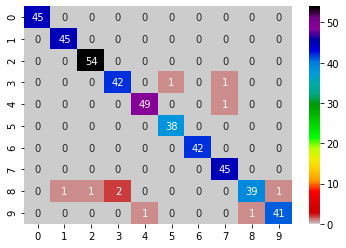

In [20]:
#using seaborn to visualize the confusion matrix
import seaborn as sns

sns.heatmap(confusion, annot=True, cmap='nipy_spectral_r')

# K-Fold and Cross Validation

In [25]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=10, random_state=11, shuffle=True)

scores = cross_val_score(estimator=knn, X=digits.data,y=digits.target, cv=kfold)

print(f'Scores: \n {scores}\n')
print(f'Mean accuracy: \n{scores.mean():.2%}\n')
print(f'Accuracy standard deviation: \n{((scores.std())* 100):.2%}')


Scores: 
 [0.97777778 0.99444444 0.98888889 0.97777778 0.98888889 0.99444444
 0.97777778 0.98882682 1.         0.98324022]

Mean accuracy: 
98.72%

Accuracy standard deviation: 
74.78%


# Finding the Best Model

In [26]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

#setting names for the estimators
estimators = {'KNeighborsClassifier': knn,
              'SVC': SVC(gamma='scale'),
              'GaussianNB': GaussianNB()}

for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
    X=digits.data, y=digits.target, cv=kfold)
    print(f'{estimator_name:>20}: ' +
    f'mean accuracy={scores.mean():.2%}; ' +
    f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=98.72%; standard deviation=0.75%
                 SVC: mean accuracy=98.72%; standard deviation=0.79%
          GaussianNB: mean accuracy=84.48%; standard deviation=3.47%


# Hyperparameter Tuning

In [27]:
for k in range(1, 20, 2):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn,
    X=digits.data, y=digits.target, cv=kfold)
    print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' +
    f'standard deviation={scores.std():.2%}')

k=1 ; mean accuracy=98.83%; standard deviation=0.58%
k=3 ; mean accuracy=98.78%; standard deviation=0.78%
k=5 ; mean accuracy=98.72%; standard deviation=0.75%
k=7 ; mean accuracy=98.44%; standard deviation=0.96%
k=9 ; mean accuracy=98.39%; standard deviation=0.80%
k=11; mean accuracy=98.39%; standard deviation=0.80%
k=13; mean accuracy=97.89%; standard deviation=0.89%
k=15; mean accuracy=97.89%; standard deviation=1.02%
k=17; mean accuracy=97.50%; standard deviation=1.00%
k=19; mean accuracy=97.66%; standard deviation=0.96%
